# Illustrative example

In [1]:
%matplotlib inline


## Importing libraries

In [2]:
from pysigmap.energy import WangAndFrost
from pysigmap.energy import BeckerEtAl
from pysigmap.bilog import Bilog
from pysigmap.boone import Boone
from pysigmap.pachecosilva import PachecoSilva
from pysigmap.casagrande import Casagrande
import pandas as pd
from pysigmap.data import Data


## Block 1: Input loading data from an external file

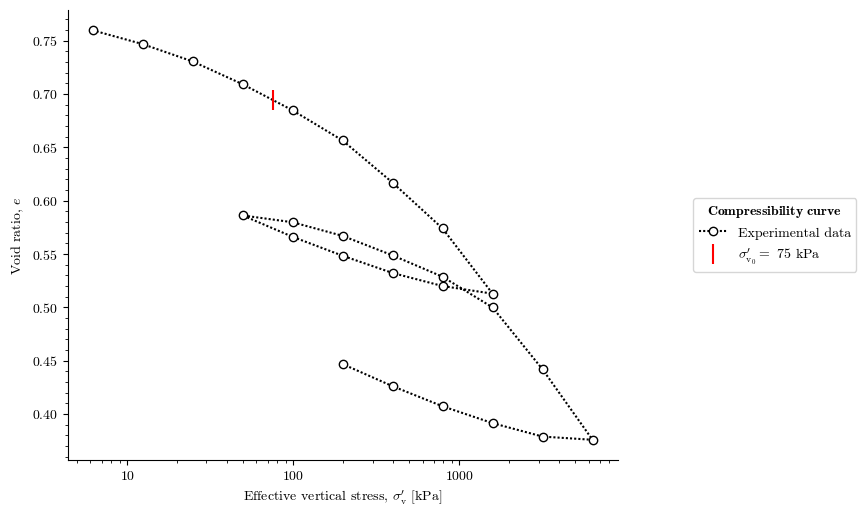

In [3]:
url = "https://raw.githubusercontent.com/eamontoyaa/data4testing/main/pysigmap/testData.csv"
df = pd.read_csv(url)
data = Data(df, sigmaV=75)
fig = data.plot()  # Figure 2a


## Block 2: $C_\mathrm{c}$ and $C_\mathrm{r}$ calculated following published criteria

### 2.1 - Default parameters: $C_\mathrm{c}$ (maximum slope) – $C_\mathrm{r}$ (opt=1)

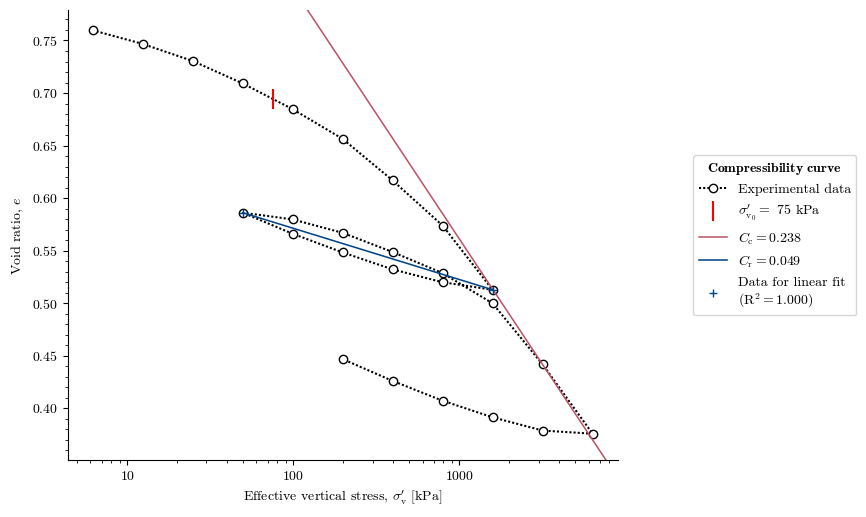

In [4]:
data.compressionIdx(range2fitCc=None)
data.recompressionIdx(opt=1)
fig = data.plot()  # Figure 2a


### 2.2: $C_\mathrm{c}$ (two last points) – $C_\mathrm{r}$ (opt=2)

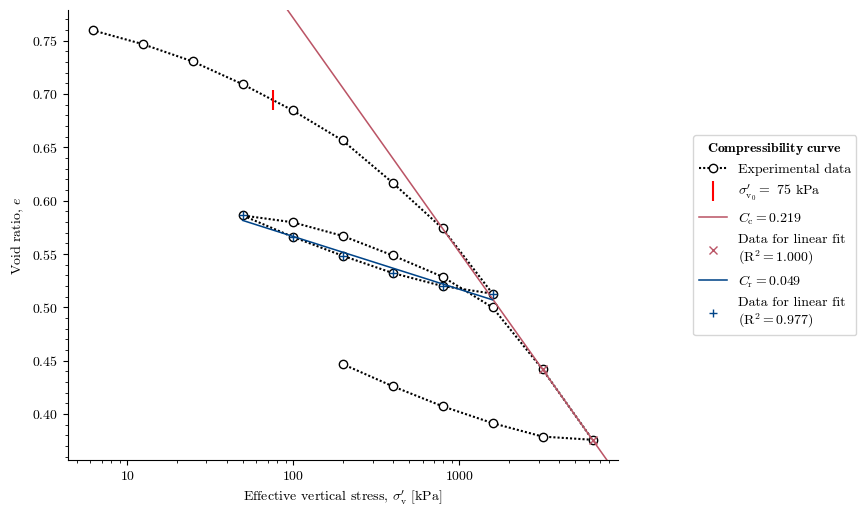

In [5]:
data.compressionIdx(range2fitCc=(3000, 8000))
data.recompressionIdx(opt=2)
fig = data.plot()  # Figure 2b


### 2.3: $C_\mathrm{c}$ (four last points) – $C_\mathrm{r}$ (opt=3)

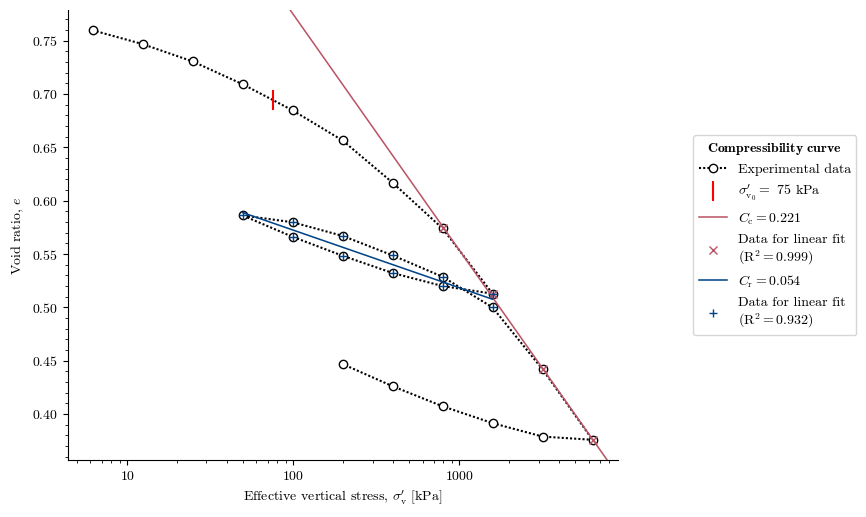

In [6]:
data.compressionIdx(range2fitCc=(700, 8000))
data.recompressionIdx(opt=3)
fig = data.plot()  # Figure 2c


## Block 3: Computation of $\sigma_{\mathrm{p}}$  via the Casagrande method

In [7]:
method = Casagrande(data)


### 3.1: Default parameters: cubic spline function

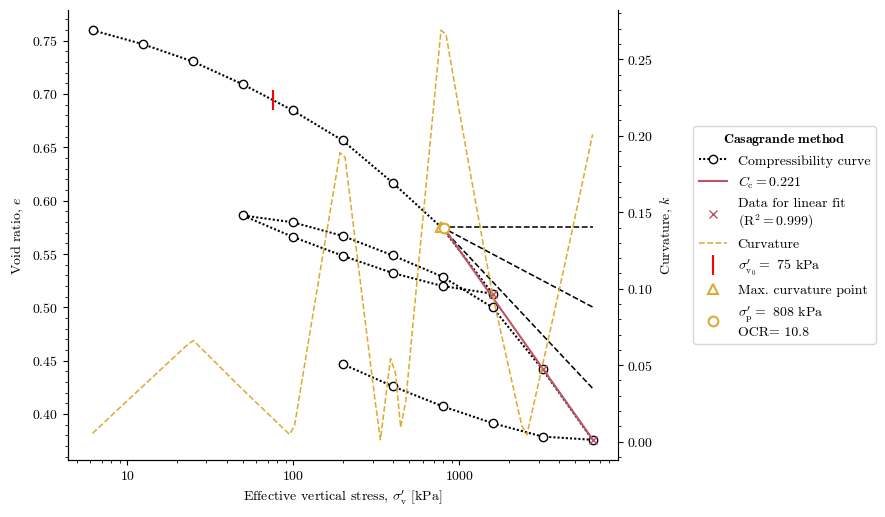

In [8]:
fig = method.getSigmaP(mcp=None, range2fitFOP=None, loglog=True)  # Figure 3a


### 3.2: Fourth order polynomial (FOP)

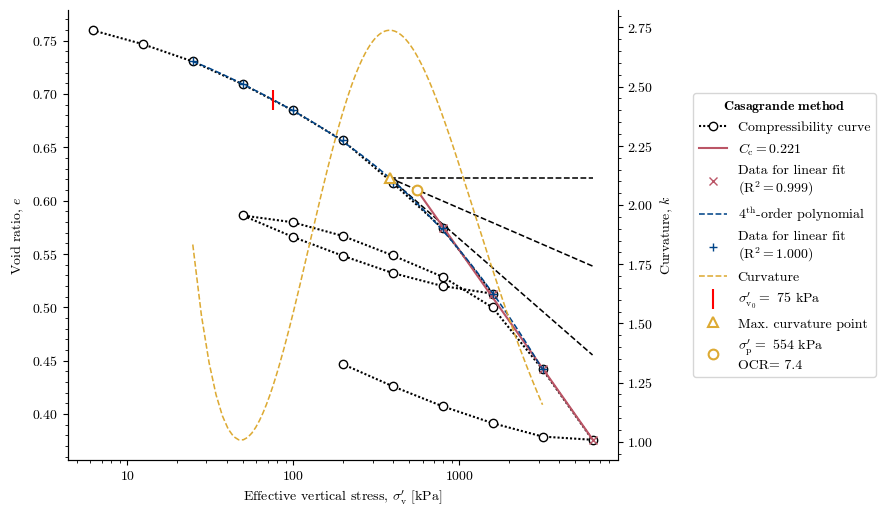

In [9]:
fig = method.getSigmaP(range2fitFOP=[20, 5000], loglog=True)  # Figure 3b


### 3.3: MCP manually introduced

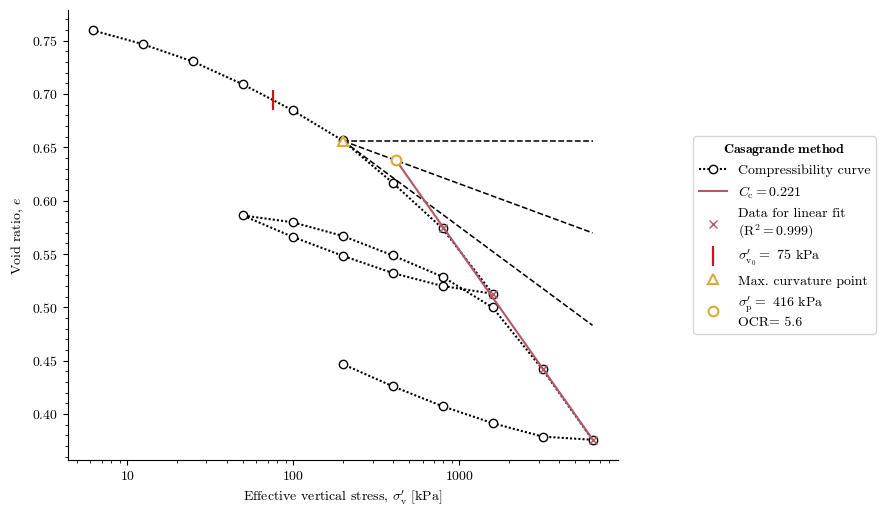

In [10]:
fig = method.getSigmaP(mcp=200)  # Not shown


## Block 4: Computation of $\sigma_{\mathrm{p}}$  via the Pacheco Silva and Boone methods

### 4.1: Pacheco Silva method

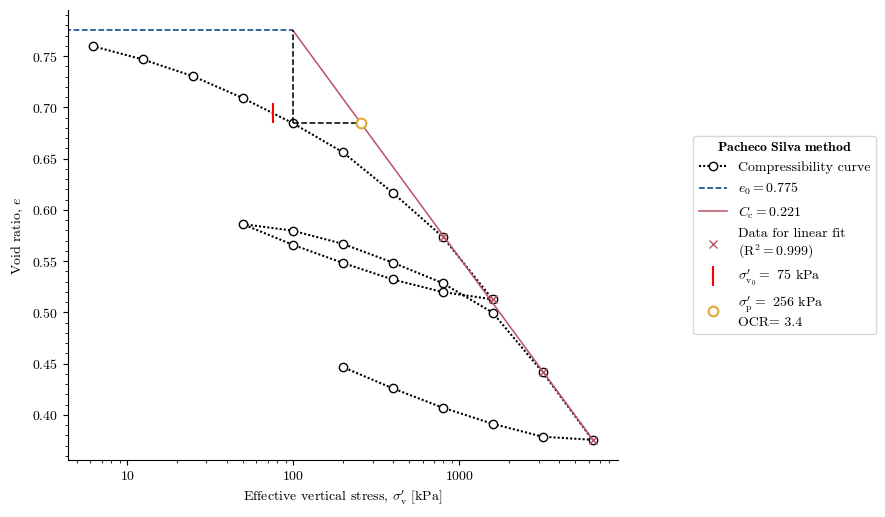

In [11]:
method = PachecoSilva(data)
fig = method.getSigmaP()  # Figure 3c


### 4.2: Boone method

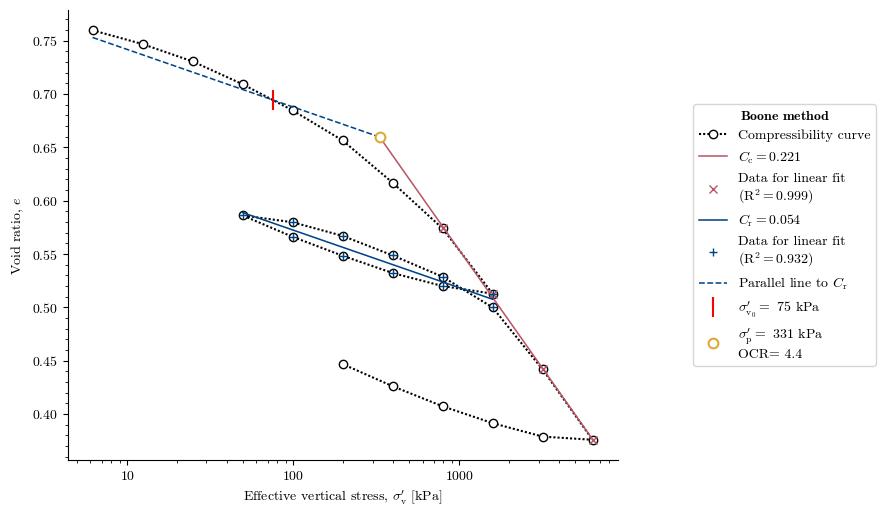

In [12]:
method = Boone(data)
fig = method.getSigmaP()  # Figure 3d


## Block 5: Computation of $\sigma_{\mathrm{p}}$  via the bilogarithmic methods

In [13]:
method = Bilog(data)


### 5.1: Butterfield method

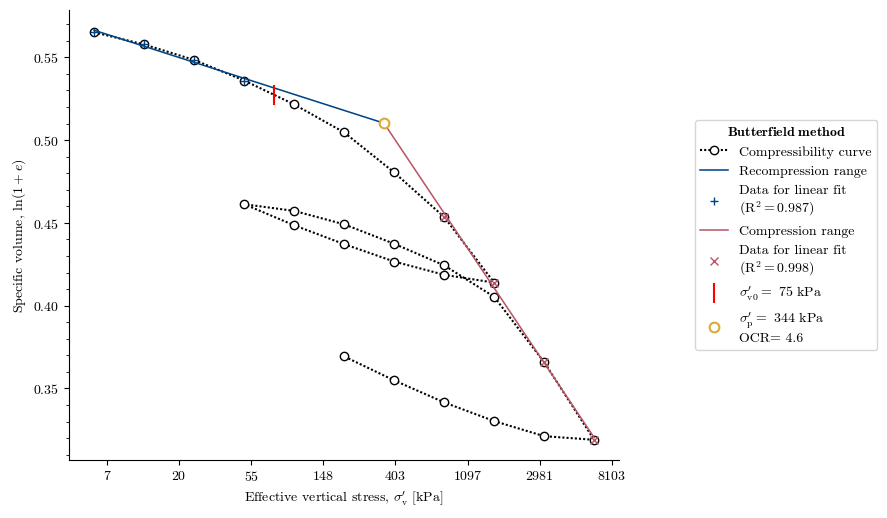

In [14]:
fig = method.getSigmaP(range2fitRR=None, range2fitCR=None, opt=1)  # Figure 4a


### 5.2: Oikawa method

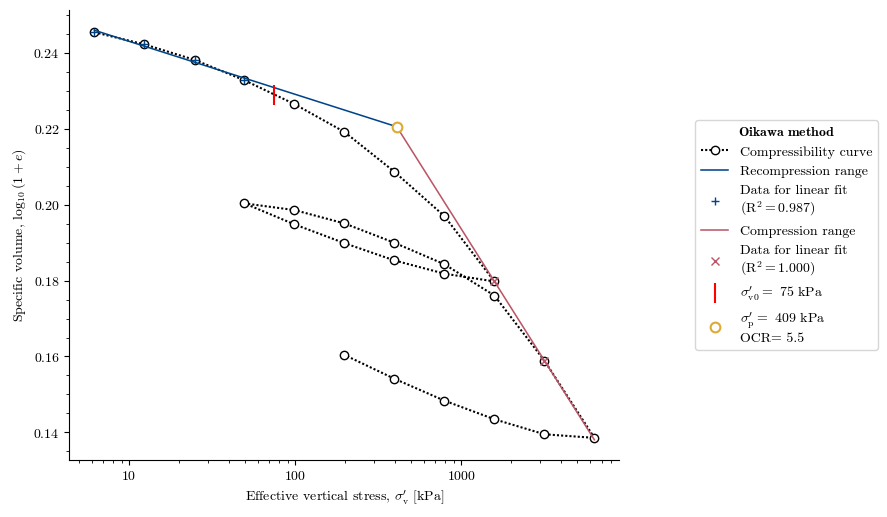

In [15]:
fig = method.getSigmaP(
    range2fitRR=None, range2fitCR=[1000, 5000], opt=2)  # Figure 4b


### 5.3: Onitsuka et al. method

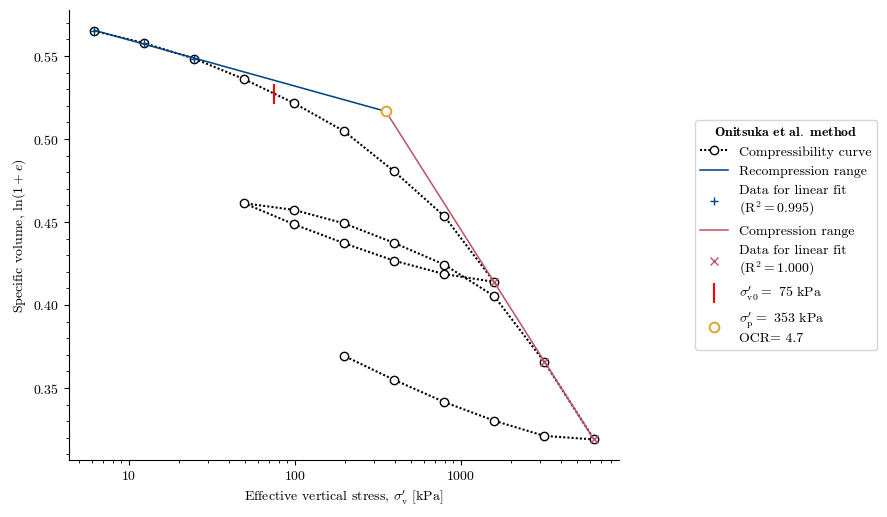

In [16]:
fig = method.getSigmaP(
    range2fitRR=[0, 30], range2fitCR=[1000, 9000], opt=3)  # Figure 4c


## Block 6: Computation of $\sigma_{\mathrm{p}}$   via the strain energy methods

In [17]:
method = BeckerEtAl(data)


### 6.1: Becker et al. method

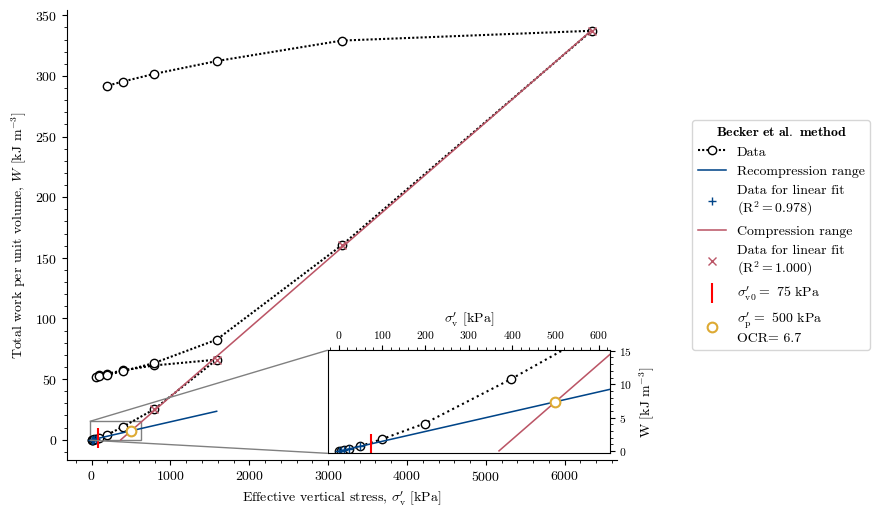

In [18]:
fig = method.getSigmaP(range2fitRR=None, range2fitCR=None,
                       morinFormulation=False, zoom=5.5)  # Figure 5a


### 6.2: Morin method

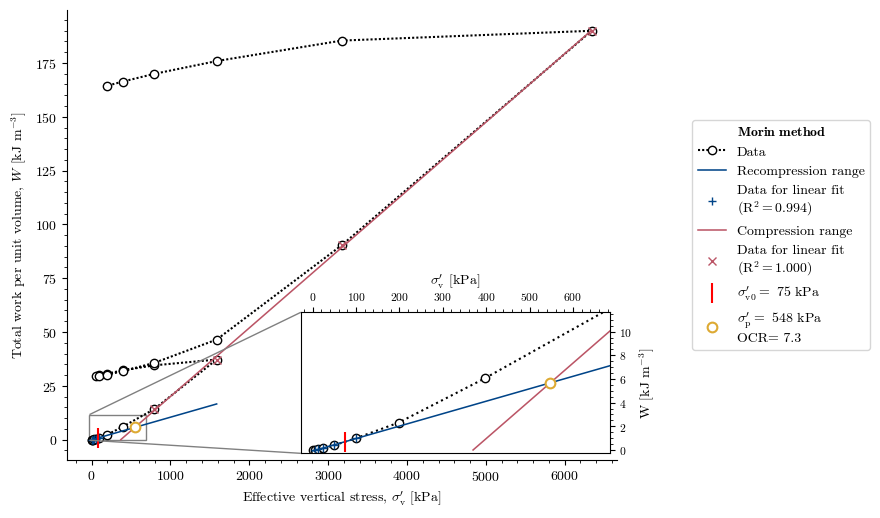

In [19]:
fig = method.getSigmaP(range2fitRR=[0, 100], range2fitCR=[700, 9000],
                       morinFormulation=True, zoom=5.5)  # Figure 5b


### 6.3: Wang and Frost method

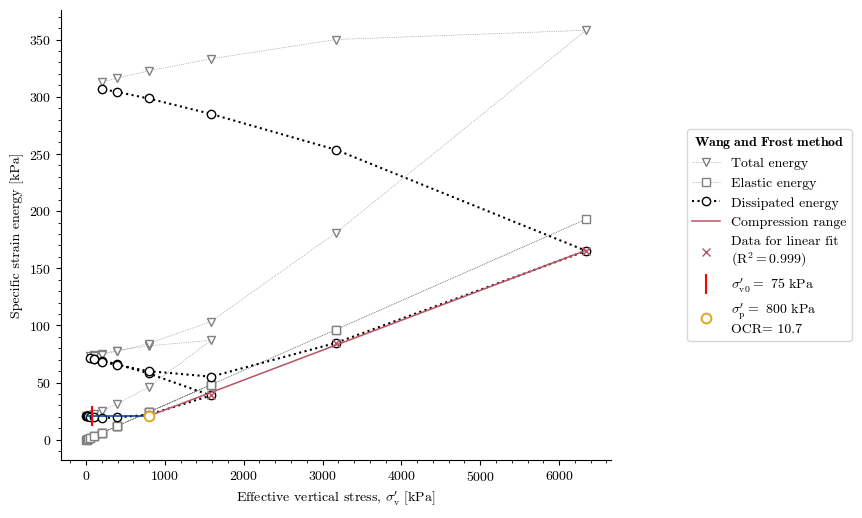

In [20]:
method = WangAndFrost(data)
fig = method.getSigmaP(range2fitCR=None)  # Figure 5c
